# Unsupervised Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**CB3: Atlegang Mogane, Lebogang Gift Molepo, Mbalenhle Malinga, Mike Ngwenya,Alette Baloyi**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


### Predict Overview: Movie Recommendation 2022
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing

<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#one>5. Exploratory Data Analysis (EDA)</a>



<a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

The growth of information on the internet offers a variety of possibilities while simultaneously making the user's search more difficult. The recommendation system uses machine learning to examine the user's historical preferences in order to account for this complexity. Numerous applications for recommender systems exist, such as marketing and consumer websites. As an illustration, the Takealot website suggests more things when someone orders a product based on what other customers have bought. A recommender system basically predicts all the associated television shows, articles, books, and other content based on the user's pick.

Most recommender systems fall into one of two categories, with a third category perhaps mixing the first two.Collaborative filtering is the first, while content filtering is the second. A model is created via collaborative filtering based on a user's prior behavior (past purchases) and the behavior of others who behave similarly. Collaboration between users results in personalized recommendations frequently. Collaborative filtering is used by Netflix, iTunes, YouTube, Amazon, and IMDB, among others. In this project, we will focus on the collaborative filtering method, which involves presenting the user with recommendations based on what other users who share their tastes have previously rated.



We will develop a movie recommender system in the first section after learning about EDA and recommender systems (Content-based Filtering). The model will then be put into use on the streamlit website, where we will receive real-time forecasts.

<a id="one"></a>
## 2. Problem Statement
<a href=#cont>Back to Table of Contents</a>

Our team has been challenged with constructing a movie recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

<a id="one"></a>
### 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [66]:
# Install packages
# Packages for data processiong
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer


#function to view dataframes side by side
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

import re
from scipy.sparse import csr_matrix
import scipy as sp

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Packages to avoid warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# Ramdomization
import random

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

<a id="one"></a>
### 4. Loading Data
<a href=#cont>Back to Table of Contents</a>

In [37]:
#loading data 
rating = pd.read_csv('train.csv')
tags = pd.read_csv('tags.csv')
movies= pd.read_csv('movies.csv')
imbd_data = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_scores =pd.read_csv('genome_scores.csv')
test = pd.read_csv('test.csv')
#imbd_data =pd.read_csv('imdb_data.csv')
links= pd.read_csv('links.csv')

# visualize the dataset
display_side_by_side(rating.head(2),movies.head(2),imbd_data.head(1), tags.head(2),genome_tags.head(2),
                     genome_scores.head(2),links.head(2),titles =
                   ['rating','movies','imbd_data', 'tags', 'genome_tags', 'genome_scores', 'links'])

rating 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 5163 
 57669 
 4.0 
 1518349992 
 
 
 1 
 106343 
 5 
 4.5 
 1206238739 
 
 
 movies 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 imbd_data 
 
 
 
 movieId 
 title_cast 
 director 
 runtime 
 budget 
 plot_keywords 
 
 
 
 
 0 
 1 
 Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste 
 John Lasseter 
 81.0 
 $30,000,000 
 toy|rivalry|cowboy|cgi animation 
 
 
 tags 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 genome_tags 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 genome_scores 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 0 
 1 
 1 
 0.02875 
 
 
 1 
 1 
 2 
 0.02375 
 
 
 links 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0

<a id="one"></a>
### 5. EDA (Exploratory Data Analysis)
<a href=#cont>Back to Table of Contents</a>

Let's first take a look at the shape of all the datasets in order to have a general overview.

In [39]:
print(f"genome_tags shape is {genome_tags.shape}")
print(f"genome_scores shape is {genome_scores.shape}")
print(f"movies shape is {movies.shape}")
print(f"imbd_data shape is {imbd_data.shape}")
print(f"links shape is {links.shape}")
print (f'rating shape is{rating.shape}')#print(train.iloc[::250000, :])
print (f'tags shape is{tags.shape}')

genome_tags shape is (1128, 2)
genome_scores shape is (15584448, 3)
movies shape is (62423, 3)
imbd_data shape is (27278, 6)
links shape is (62423, 3)
rating shape is(10000038, 4)
tags shape is(1093360, 4)


In [40]:
#check null values of the datasets
print(f"genome_tags null values is: {genome_tags.isnull().mean()*100}")
print(f"genome_scores null values is: {genome_scores.isnull().mean()*100}")
print(f"movies shape null values is: {movies.isnull().mean()*100}")
print(f"imbd_data null values is: {imbd_data.isnull().mean()*100}")
print(f"links null values is: {links.isnull().mean()*100}")
print (f'rating null values is:{rating.isnull().mean()*100}')
print (f'tags null values is:{tags.isnull().mean()*100}')

genome_tags null values is: tagId    0.0
tag      0.0
dtype: float64
genome_scores null values is: movieId      0.0
tagId        0.0
relevance    0.0
dtype: float64
movies shape null values is: movieId    0.0
title      0.0
genres     0.0
dtype: float64
imbd_data null values is: movieId           0.000000
title_cast       36.908864
director         36.197668
runtime          44.317765
budget           71.016937
plot_keywords    40.611482
dtype: float64
links null values is: movieId    0.000000
imdbId     0.000000
tmdbId     0.171411
dtype: float64
rating null values is:userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64
tags null values is:userId       0.000000
movieId      0.000000
tag          0.001463
timestamp    0.000000
dtype: float64


In [42]:
num_users = len(rating.userId.unique())
num_items = len(rating.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 162541 unique users and 48213 unique movies in this data set


In [43]:
#get count
df_ratings_count = pd.DataFrame(rating.groupby('rating').size(), columns=['count'])
df_ratings_count

,count
rating,
0.5,157571
1.0,311213
1.5,159731
2.0,656821
2.5,505578
3.0,1959759
3.5,1270642
4.0,2652977
4.5,880516


In [44]:
#total ratings
total_cnt = df_ratings_count['count'].sum()
total_cnt

10000038

<AxesSubplot:xlabel='rating'>

<Figure size 720x360 with 0 Axes>

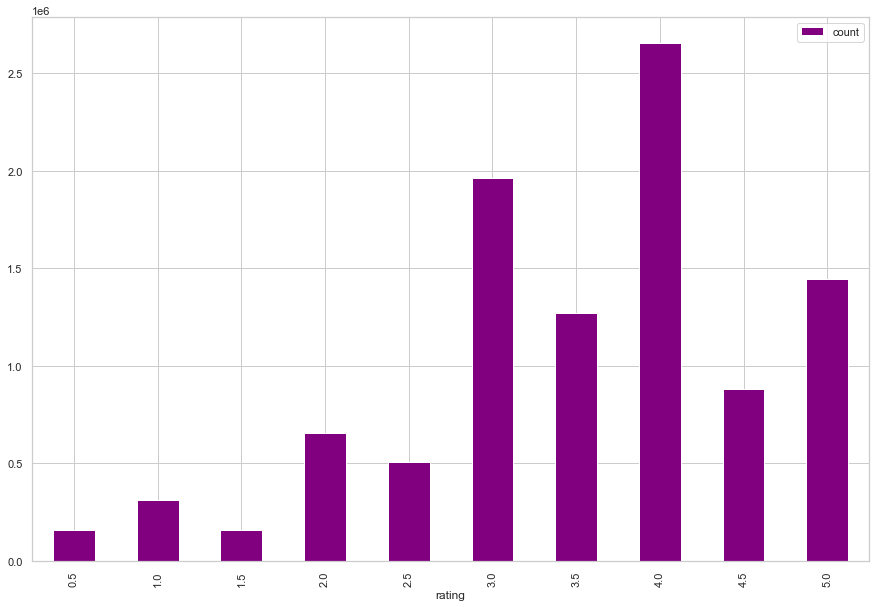

In [45]:
#plotting bar chart to represent count per rating category
plt.figure(figsize =(10,5))

pd.DataFrame(rating.groupby('rating').size(), columns=['count']).plot(kind ='bar', color = 'purple')

In [46]:
# get rating frequency
df_movies_cnt = pd.DataFrame(rating.groupby('movieId').size(), columns=['count'])
df_movies_cnt.head()

,count
movieId,
1,23062
2,9654
3,4727
4,968
5,4648


In [47]:
#takes time
#pd.DataFrame(rating.groupby('movieId').size(), columns=['count']).plot(kind ='bar', color = 'orange')

Text(0, 0.5, 'number of ratings')

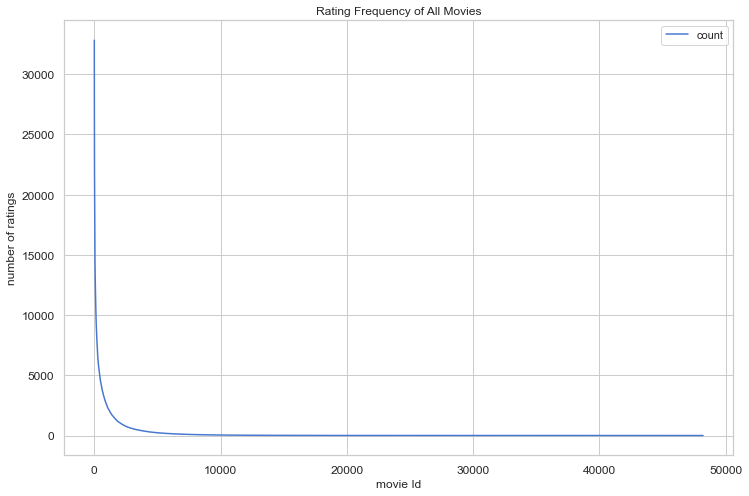

In [48]:
# plot rating frequency of all movies
ax = df_movies_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

The distribution of movie ratings frequently satisfies a property known as the long-tail property in real-world settings. The long tail property is supported by two hypotheses: the first is that the majority of consumers consistently follow the crowd and only a minority are interested in niche content; the second is that everyone is a bit eccentric, consuming both popular and specialty products. We discovered that the first hypothesis was correct. The vast majority of movies are rarely rated. As a result, the underlying ratings have a highly skewed distribution. Let's look at the movie distribution quartiles by rating now.

In [49]:
df_movies_cnt['count'].quantile(np.arange(1, 0.4, -0.1))

1.0    32831.0
0.9      252.0
0.8       49.0
0.7       15.0
0.6        7.0
0.5        4.0
Name: count, dtype: float64

We can see that approximately 1% of movies have 32831 ratings, 10% have 252, 20% have 49, and 50% have four ratings. Because we have so many movies, we'll limit it to the top 25%. We want to limit our dataset to roughly 33147 movies for two reasons. We don't want the "MemoryError" to occur during model training.

1.Improve model performance: less well-known films have fewer ratings, making the pattern noisier.

2.Reducing the number of movies you watch can help you make better recommendations.

In [50]:
# filter data
popularity_thres = 48
popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = rating[rating.movieId.isin(popular_movies)]

print('shape of original ratings data: ', rating.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

shape of original ratings data:  (10000038, 4)
shape of ratings data after dropping unpopular movies:  (9752048, 4)


In [51]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_users_cnt.head()

,count
userId,
1,26
2,72
3,250
4,87
5,35


In [52]:
df_users_cnt['count'].quantile(np.arange(1, 0.4, -0.1))

1.0    3287.0
0.9     140.0
0.8      80.0
0.7      53.0
0.6      38.0
0.5      28.0
Name: count, dtype: float64

When popular movies are viewed, a similar pattern is observed with active users. We can see that approximately 1% of users (3277), 10% of approximately 140, 20% with 80 users, and 70% with 53 users. This will be our arbitrary threshold for removing users with few ratings.

In [53]:
# filter data
ratings_thres = 53
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]

print('shape of original ratings data: ', rating.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (10000038, 4)
shape of ratings data after dropping both unpopular movies and inactive users:  (7285651, 4)


In [54]:
new_df =df_ratings_drop_users.copy()

To get more insights into the datasets we need to merge datesets to create one dataframe. We will start with the movies and the new_df

## Merging datasets

In [55]:
#To get more insights on the dataframes
#we will use the original ratings dataframe since new_df has been altered
movie_df = pd.merge(rating,movies, on  = 'movieId')
movie_df

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
10000033,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War
10000034,72315,190143,2.5,1567628158,Formentera Lady,(no genres listed)
10000035,131116,206347,3.0,1568558126,Nocturne (1946),Crime|Drama|Mystery
10000036,85757,196867,3.5,1563175258,Guys & Balls (2004),Comedy|Romance


In [56]:
#dataframe for average rating
avg_movie_df = movie_df.groupby('title')['rating'].mean().sort_values(ascending = False).reset_index().rename(columns= {'rating': 'average_rating'})
movies_ranting_count = movie_df.groupby('title')['rating'].count().sort_values(ascending = True).reset_index().rename(columns= {'rating': 'rating_count'})
#meging the two dataframes
movies_rating_count_df = movies_ranting_count.merge(round(avg_movie_df,0), on= 'title')
movies_rating_count_df

,title,rating_count,average_rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1,3.0
1,Love's Coming (2014),1,2.0
2,Love's Brother (2004),1,2.0
3,Love's Abiding Joy (2006),1,4.0
4,Love on the Dole (1941),1,3.0
...,...,...,...
48146,"Matrix, The (1999)",29014,4.0
48147,"Silence of the Lambs, The (1991)",29444,4.0
48148,Pulp Fiction (1994),31697,4.0
48149,Forrest Gump (1994),32383,4.0


From the plot above we can see that the most rated or liked movie is Shawshank Redemption with average rating of 4.0 and Love's coming together with Love;s brother with average rating of 2.0.

<AxesSubplot:xlabel='rating', ylabel='Count'>

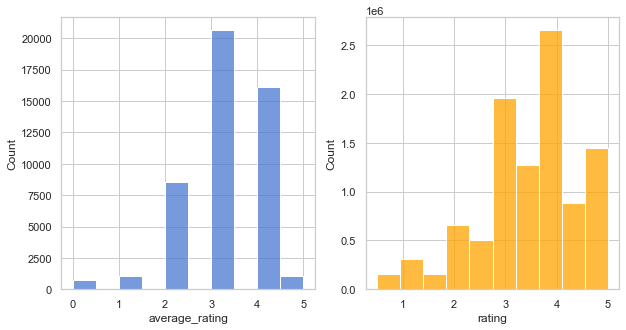

In [57]:
plt.figure(figsize =(10,5))
plt.subplot(1,2, 1)
sns.histplot(data= movies_rating_count_df, x= 'average_rating', bins = 10)

plt.subplot(1,2, 2)
sns.histplot(data= movie_df, x= 'rating', bins = 10, color= 'orange')

Observation: The plots show that the rating distribution is different. When the rating is taken without the average, there are a large number of rated movies, which can lead to the bias of thinking a movie is highly rated when it was only rated by a few people. The change has been effected into the new_df, where inactive users and low rated movies are removed.

To get insights about who is the most director, movie genre we need to merge the following datasets

In [58]:
df = imbd_data[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


Now we need to manipulate the columns that we call be able to call them as strings

In [59]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

We can now handle the strings from the data, now we create a fuction that will be able to call the wordclouds

In [60]:
def wordcloud_generator(df, column):  
    """
    This function extracts all the unique keywords in a column
    and counts the number of times each keyword occurs in the column
    while ignoring words that are not meaningful.
    these keywords are then used to generate a word cloud 
    
    Input: df
           datatype: DataFrame
           column
           datatype: str
           
    Output: wordcloud
            Datatype: None
            
    """    
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     
    # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Greens').generate_from_frequencies(words)

    return wordcloud 

In [61]:
# Plot wordcloud
plot_keywords = wordcloud_generator(df, 'plot_keywords')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('Plot keywords\n', fontsize=25)
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
# Plot genres
plot_genres = wordcloud_generator(df, 'genres')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('genres\n', fontsize=25)
plt.show()

In [ ]:
# Generate a wordcloud using the 2000 most frequently occuring actors' names in the dataset
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))
actors = wordcloud_generator(df, 'title_cast')

# plot the WordCloud                        
f = plt.figure(figsize=(20, 8)) 
plt.imshow(actors) 
plt.axis('off') 
plt.title('Actors\n', fontsize=25)
plt.show()

According to the wordcloud, the most frequently searched key words are: Documentary, action, Comedy, sex, and Rated are the most popular movies. Furthermore, we can see that the searched genres are nearly identical to keywords; genres such as Action, Documentary, rated, and so on are prominent in this category. While it is clear that users primarily look for actors such as Eddie Murphy, Cameron Diaz, and Mike Myers.